In [2]:
import matplotlib.pyplot as plt
import scikit-learn
import pandas as pd
import numpy as np

In [125]:
crow_winrates = pd.read_csv("crow_winrates.csv")
crow_winrates['ship'] = crow_winrates['ship'].str.title()
#crow_winrates = crow_winrates.drop(crow_winrates.index[crow_winrates['ship'] == 'kestrel b*'][0])
#crow_winrates = crow_winrates.drop(crow_winrates.index[crow_winrates['ship'] == 'mantis'][0])

In [126]:
crow_winrates

,ship,winOrloss,kills,jumps,scrap,score
0,Kestrel A,w,33.0,102.0,1705.0,5077.0
1,Mantis B,w,46.0,103.0,1956.0,5859.0
2,Zoltan B,w,37.0,102.0,1547.0,4960.0
3,Engi C,w,39.0,101.0,1881.0,5506.0
4,Stealth A,w,53.0,104.0,2095.0,6292.0
...,...,...,...,...,...,...
257,Mantis B,w,66.0,111.0,2478.0,7362.0
258,Engi B,w,30.0,99.0,1490.0,4620.0
259,Rock C,w,37.0,99.0,1702.0,5148.0
260,Kestrel B,w,43.0,103.0,1923.0,5719.0


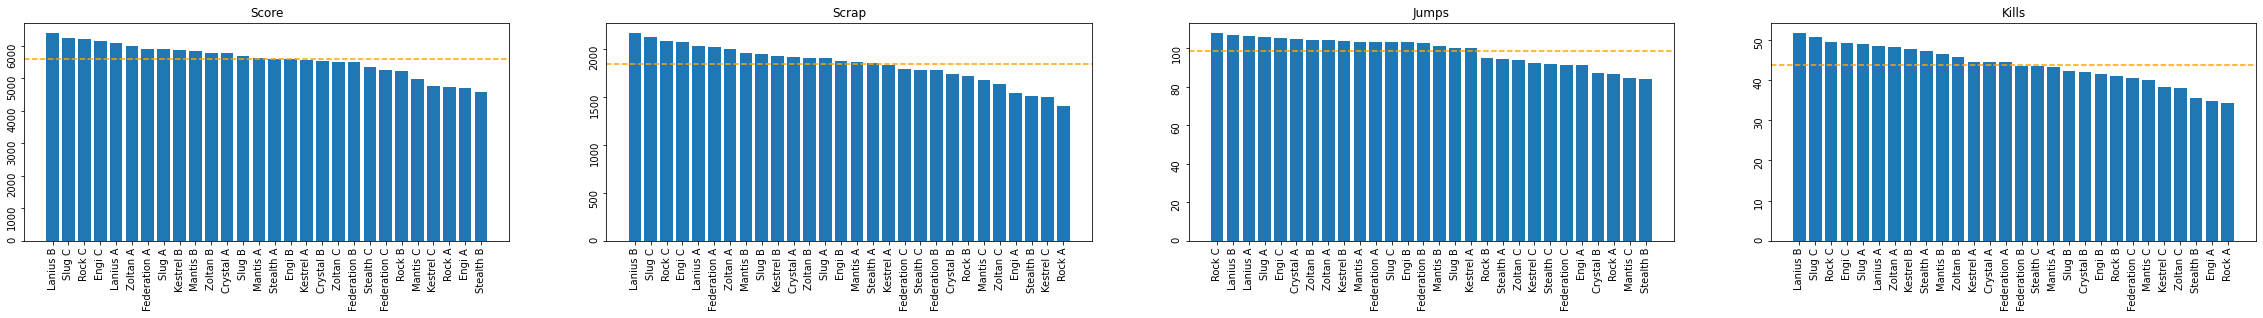

In [127]:
crow_plots = crow_winrates.groupby(by='ship').agg('mean').reset_index()

fig, ax = plt.subplots(1,4)
fig.set_figwidth(40)

crow_plots = crow_plots.sort_values('score', ascending = False)
ax[0].bar(crow_plots['ship'], crow_plots['score'])
ax[0].tick_params(rotation = 90)
ax[0].title.set_text('Score')
ax[0].axhline(crow_plots['score'].mean(), color='orange', linestyle='--')

crow_plots = crow_plots.sort_values('scrap', ascending = False)
ax[1].bar(crow_plots['ship'], crow_plots['scrap'])
ax[1].tick_params(rotation = 90)
ax[1].title.set_text('Scrap')
ax[1].axhline(crow_plots['scrap'].mean(), color='orange', linestyle='--')

crow_plots = crow_plots.sort_values('jumps', ascending = False)
ax[2].bar(crow_plots['ship'], crow_plots['jumps'])
ax[2].tick_params(rotation = 90)
ax[2].title.set_text('Jumps')
ax[2].axhline(crow_plots['jumps'].mean(), color='orange', linestyle='--')

crow_plots = crow_plots.sort_values('kills', ascending = False)
ax[3].bar(crow_plots['ship'], crow_plots['kills'])
ax[3].tick_params(rotation = 90)
ax[3].title.set_text('Kills')
ax[3].axhline(crow_plots['kills'].mean(), color='orange', linestyle='--')

plt.savefig("./images/all_stats.png", dpi=500, bbox_inches='tight')

In [156]:
def gen_plots(input_table):

    fig, ax = plt.subplots(1,4)
    fig.set_figwidth(40)
    
    plot_titles = ['Avg. Score', 'Avg. Scrap', 'Avg. Jumps', 'Avg. Kills']

    for i in range(4):
        ax[i].bar(input_table['ship'], input_table[input_table.columns[i]].sort_values([input_table.columns[i]]), ascending = False)
        ax[i].tick_params(rotation = 90)
        ax[i].title.set_text(plot_titles[i])
        ax[i].axhline(input_table[input_table.columns[i+1]].mean(), color='orange', linestyle='--')

    plt.savefig("./images/all_stats.png", dpi=500, bbox_inches='tight')

In [163]:
def gen_plots(input_table):

    fig, ax = plt.subplots(1,4)
    fig.set_figwidth(40)
    
    plot_titles = ['Avg. Score', 'Avg. Scrap', 'Avg. Jumps', 'Avg. Kills']

    for i in range(4):
        input_table = input_table.sort_values(input_table.columns[i+1], ascending = False)
        ax[i].bar(input_table['ship'], input_table[input_table.columns[i+1]])
        ax[i].tick_params(rotation = 90)
        ax[i].title.set_text(plot_titles[i])
        ax[i].axhline(input_table[input_table.columns[i+1]].mean(), color='orange', linestyle='--')

    plt.savefig("./images/all_stats.png", dpi=500, bbox_inches='tight')

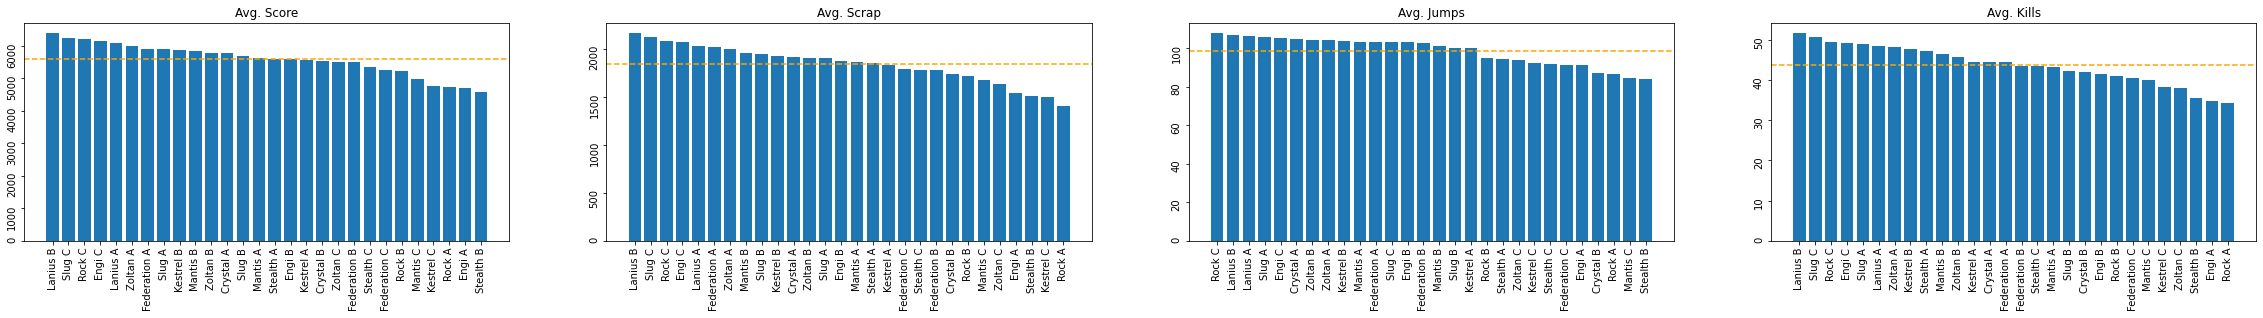

In [164]:
gen_plots(crow_plots)